In [2]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import INPUT_PATH, OUTPUT_PATH

In [3]:
batch = pd.read_parquet(INPUT_PATH / "train" / "batch_100.parquet")

In [51]:
batch["time"].describe()

count    3.299884e+07
mean     1.289716e+04
std      4.382441e+03
min      5.713000e+03
25%      1.054600e+04
50%      1.173900e+04
75%      1.370800e+04
max      7.588700e+04
Name: time, dtype: float64

In [4]:
time_reset = batch["time"] - batch.groupby("event_id")["time"].min()

In [5]:
time_reset.describe()

count    3.299884e+07
mean     6.196013e+03
std      3.095932e+03
min      0.000000e+00
25%      4.324000e+03
50%      5.479000e+03
75%      7.294000e+03
max      4.127400e+04
Name: time, dtype: float64

In [6]:
((time_reset - 6000) / 6000).describe()

count    3.299884e+07
mean     3.266879e-02
std      5.159887e-01
min     -1.000000e+00
25%     -2.793333e-01
50%     -8.683333e-02
75%      2.156667e-01
max      5.879000e+00
Name: time, dtype: float64

<AxesSubplot: >

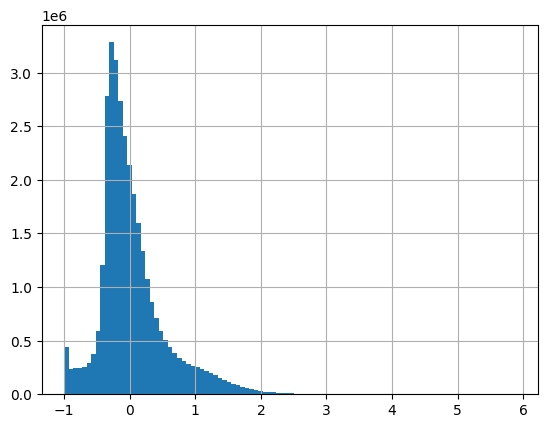

In [7]:
time_norm = (time_reset - 6000) / 6000
             
time_norm.hist(bins=100)

count    3.299884e+07
mean     9.657191e-01
std      1.460814e+00
min     -1.429000e+00
25%      1.820000e-01
50%      5.796667e-01
75%      1.236000e+00
max      2.196233e+01
Name: time, dtype: float64


<AxesSubplot: >

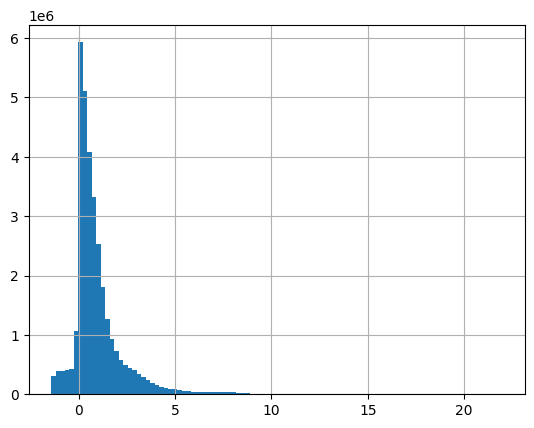

In [52]:
time_norm2 = ((batch["time"] - 1e4) / 3000)
print(time_norm2.describe())     
time_norm2.hist(bins=100)

<AxesSubplot: >

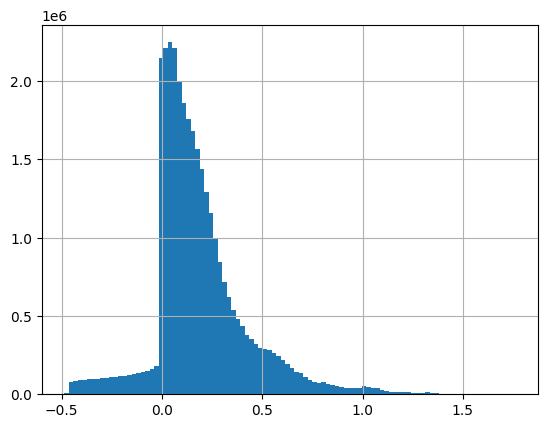

In [45]:
((np.log10(batch["time"]) - 4.0) * 2).hist(bins=100)

<AxesSubplot: >

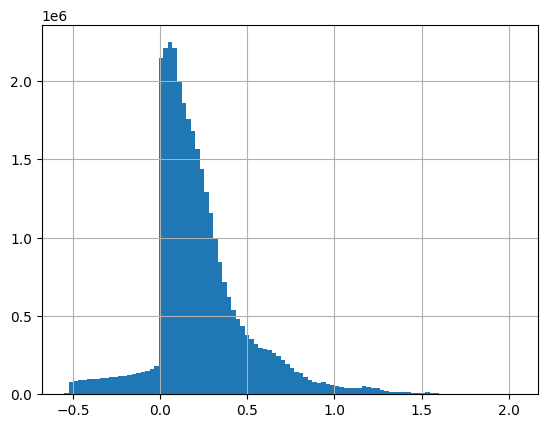

In [46]:
((np.log(batch["time"]) - 9.2)).hist(bins=100)

In [33]:
batch["time"].median(), batch["time"].quantile(0.75) - batch["time"].quantile(0.25)

(11739.0, 3162.0)

<AxesSubplot: >

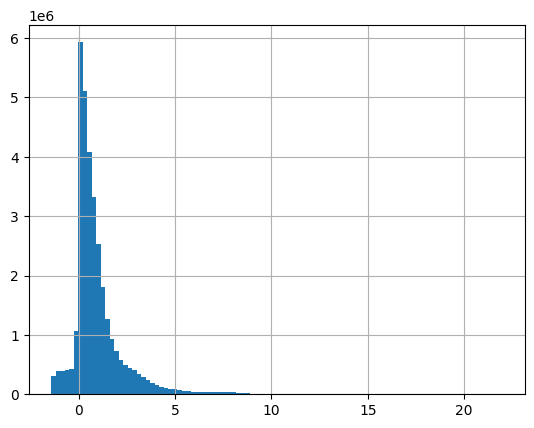

In [53]:
time_norm3 = (batch["time"] - 1e4) / 3e4  # GraphNet scaling https://github.com/graphnet-team/graphnet/blob/4df8f396400da3cfca4ff1e0593a0c7d1b5b5195/src/graphnet/models/detector/icecube.py#L68
time_norm3 *= 10      
time_norm3.hist(bins=100)

In [54]:
time_norm3.describe()

count    3.299884e+07
mean     9.657191e-01
std      1.460814e+00
min     -1.429000e+00
25%      1.820000e-01
50%      5.796667e-01
75%      1.236000e+00
max      2.196233e+01
Name: time, dtype: float64